In [1]:
# importing Lib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv("E:/DATA_SCIENCE/Diabeties Prediction/Data/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df["Pregnancies"].unique()
df["Glucose"].max()
df["BloodPressure"].unique()
df["SkinThickness"].unique()
df["Insulin"].unique()
df["BMI"].unique()
df["DiabetesPedigreeFunction"].unique()
df["Age"].max()

81

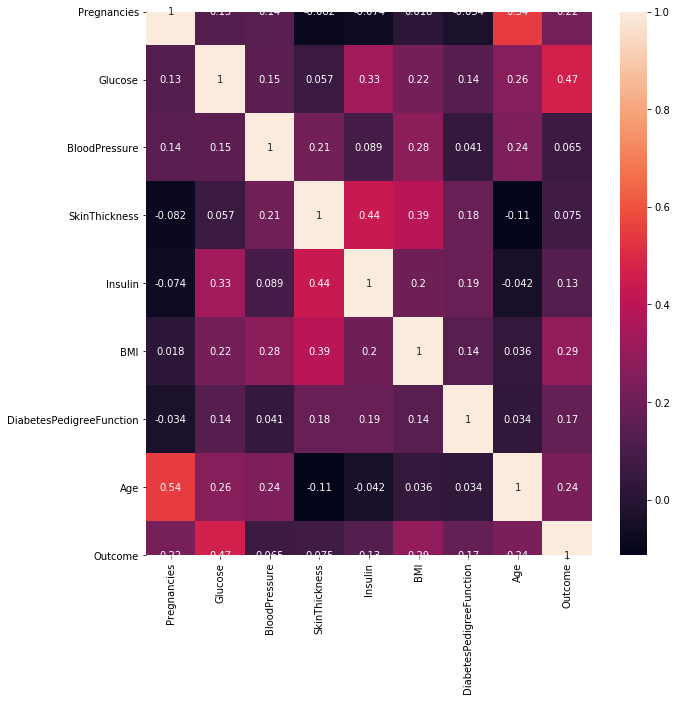

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [7]:
X = df.drop(labels="Outcome",axis=1)
Y = df["Outcome"]

In [8]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean")

X = fill_values.fit_transform(X)


In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y , test_size=0.3,random_state =10)

In [10]:
## applying model
from sklearn.ensemble import  RandomForestClassifier 
rf_classifier = RandomForestClassifier(random_state=10)

rf_classifier.fit(X_train, Y_train.ravel())


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [11]:
# checking Accuracy of a model
predict_train_data = rf_classifier.predict(X_test)

from sklearn import metrics

print(metrics.classification_report(Y_test, predict_train_data))


              precision    recall  f1-score   support

           0       0.75      0.88      0.81       144
           1       0.71      0.51      0.59        87

    accuracy                           0.74       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.73      0.74      0.72       231



In [12]:
# HyperParameter tuning
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [13]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_scale = Scaler.fit_transform(X)

In [14]:
Xl_train , Xl_test , yl_train,yl_test  = train_test_split(X,Y,test_size=0.3,random_state=10)

In [15]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(Xl_train,yl_train)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
predict = logistic.predict(Xl_test)
from sklearn.metrics import classification_report
print(metrics.classification_report(yl_test,predict))



              precision    recall  f1-score   support

           0       0.73      0.90      0.80       144
           1       0.72      0.45      0.55        87

    accuracy                           0.73       231
   macro avg       0.73      0.67      0.68       231
weighted avg       0.73      0.73      0.71       231



In [17]:


import pickle
# open a file, where you ant to store the data
file = open('rf_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_classifier, file)




In [18]:
model = pickle.load(open('rf_model.pkl', 'rb'))